C:\Users\Kunal\AppData\Local\Temp\ipykernel_28084\3969296163.py:43: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


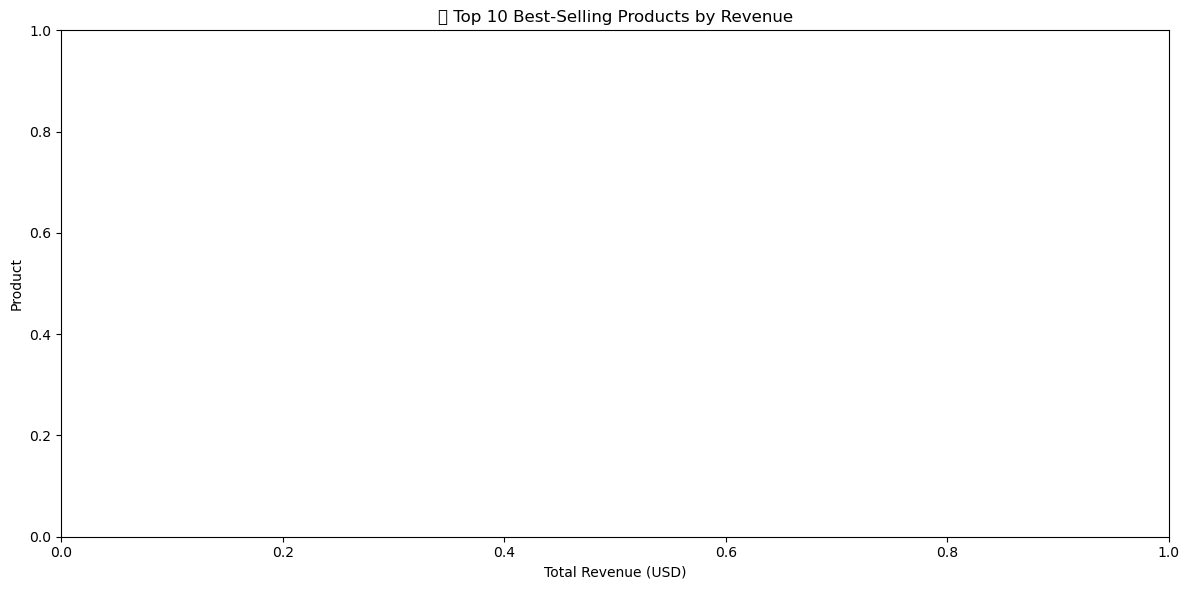

C:\Users\Kunal\AppData\Local\Temp\ipykernel_28084\3969296163.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


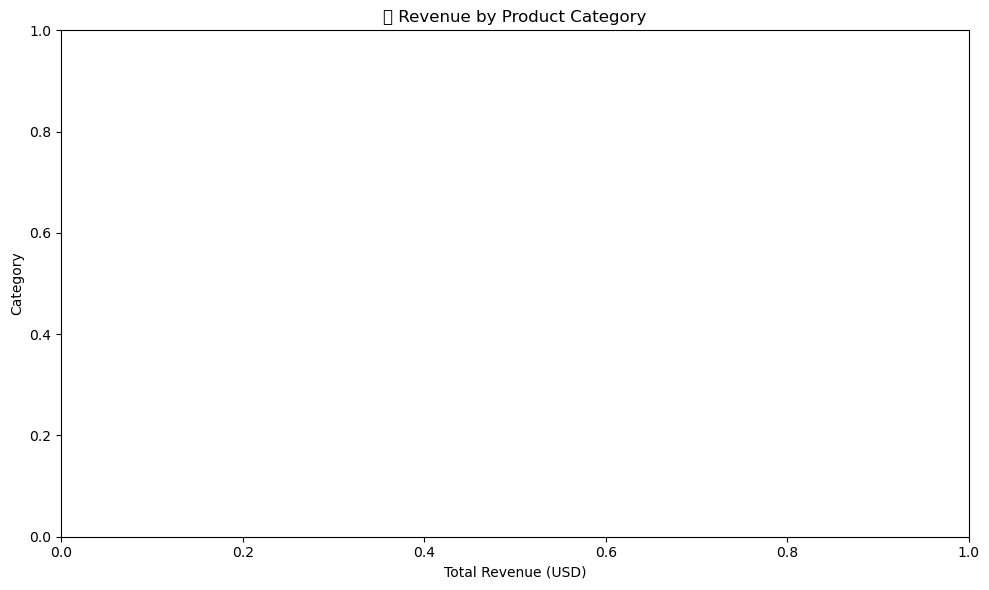

📝 Key Insights:
• Top 5 Best-Selling Products by Revenue:

• Top 3 Categories by Revenue:

✅ Recommendation:
• Ensure high stock availability for best-sellers.
• Run promotional campaigns for low-performing categories.
• Consider bundling or upselling top products for more profit.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ecommerce_data_final_cleaned.csv")

# Rename relevant columns for convenience
df = df.rename(columns={
    'value [USD]': 'total_revenue',
    'product_category': 'category'
})

# --------------------------------------------
# 1️⃣ Group Sales Data by Product and Category
# --------------------------------------------

# Check available product column
if 'product_name' in df.columns:
    product_col = 'product_name'
elif 'Unnamed: 7' in df.columns:
    product_col = 'Unnamed: 7'
else:
    raise Exception("❌ Product column not found!")

# Remove missing product/category entries
df = df[df[product_col].notnull()]
df = df[df['category'].notnull()]

# --------------------------------------------
# 2️⃣ Find the Best-Selling Products
# --------------------------------------------
# Top 10 products by revenue
top_products = df.groupby(product_col)['total_revenue'].sum().reset_index()
top_products = top_products.sort_values(by='total_revenue', ascending=False).head(10)

# Plot top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, y=product_col, x='total_revenue', palette='crest')
plt.title("🏆 Top 10 Best-Selling Products by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 3️⃣ Analyze Best-Selling Categories
# --------------------------------------------
top_categories = df.groupby('category')['total_revenue'].sum().reset_index()
top_categories = top_categories.sort_values(by='total_revenue', ascending=False)

# Plot category revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories, x='total_revenue', y='category', palette='mako')
plt.title("📊 Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4️⃣ Document Key Findings
# --------------------------------------------
print("📝 Key Insights:")
print("• Top 5 Best-Selling Products by Revenue:")
for i, row in top_products.head(5).iterrows():
    print(f"  {i+1}. {row[product_col]} - ${row['total_revenue']:,.2f}")

print("\n• Top 3 Categories by Revenue:")
for i, row in top_categories.head(3).iterrows():
    print(f"  {i+1}. {row['category']} - ${row['total_revenue']:,.2f}")

print("\n✅ Recommendation:")
print("• Ensure high stock availability for best-sellers.")
print("• Run promotional campaigns for low-performing categories.")
print("• Consider bundling or upselling top products for more profit.")
